#TRABAJO AUTÓNOMO
Objetivo:
Realizar un análisis completo del dataset proporcionado, aplicando el
proceso KDD (Knowledge Discovery in Databases) y utilizando algoritmos de
clustering no supervisado (K-Means y Jerárquico) para identificar patrones,
agrupaciones naturales y extraer conclusiones relevantes

**Integrantes:**

- Faubla Ordoñez Evelyn Lisbeth
- Gonzalez Saltos Johan
- Casanova Castro Diego

##Importacion de Libreria y dataset
El siguiente dataset muestra la desinformación de diferentes redes sociales como Twitter, Facebook, Instagram, YouTube y Tiktok, el dataset muestra una vista detallada de cómo funcionan los diferentes tipos de contenido, como interactuan los usuarios entre ellos y como responde el sistema de moderación.





**Procesamiento de datos**

In [ ]:
##Importamos las librerias

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram


**Análisis exploratorio**

• Estadísticas descriptivas (media, distribución, correlaciones).

• Visualizaciones (boxplots, histogramas, scatter plots) para entender la
estructura de los datos

In [ ]:
df = pd.read_csv('social media content and misinformation data.csv')


In [ ]:
#Informacion de datos y valores nulos
df.info()

#Dimensiones  del dataset
print("Dimensiones del dataset:", df.shape)

#mostrar primeras filas
display(df.head())

#Mostrar ultimas filas
display(df.tail())

#Mostrar el nombres de las columnas
print("Nombres de las columnas:", df.columns)

#Mostrar tipos de datos de cada columna
print("Tipos de datos de cada columna:", df.dtypes)

#Estadisticas descriptivas de columnas numericas
display(df.describe())

#Estadísticas descriptivas de todas las columnas
display(df.describe(include='all'))

#Identificar valores nulos, unicos y duplicados
print('\nValores nulos por columna:\n', df.isnull().sum())
print('\nTotal de valores nulos:', df.isnull().sum().sum())
print('\nValores duplicados:', df.duplicated().sum())
print('\nValores unicos por columna:\n', df.nunique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Platform              40 non-null     object 
 1   Content_Type          40 non-null     object 
 2   Post_ID               40 non-null     object 
 3   Timestamp             40 non-null     object 
 4   User_Followers        40 non-null     int64  
 5   Content_Text          40 non-null     object 
 6   Language              40 non-null     object 
 7   Country               40 non-null     object 
 8   Engagement_Score      40 non-null     float64
 9   Like_Count            40 non-null     int64  
 10  Share_Count           40 non-null     int64  
 11  Comment_Count         40 non-null     int64  
 12  Verification_Status   40 non-null     object 
 13  Content_Category      40 non-null     object 
 14  Misinformation_Flag   40 non-null     object 
 15  Fact_Check_Source     27 

,Platform,Content_Type,Post_ID,Timestamp,User_Followers,Content_Text,Language,Country,Engagement_Score,Like_Count,...,Fact_Check_Source,Sentiment_Score,Toxicity_Score,Political_Leaning,Topic_Tags,Content_Length_Chars,Media_Type,Has_External_Link,Viral_Score,Moderation_Action
0,Twitter,Tweet,tw_001,2024-08-13T09:15:23Z,15420,Climate change is just a natural cycle - the E...,English,United States,0.72,234,...,Reuters,0.23,0.15,Conservative,climate;science;environment,97,Text,False,0.68,Warning_Label
1,Facebook,Post,fb_002,2024-08-13T11:32:45Z,8934,New vaccine study shows 99% effectiveness agai...,English,United Kingdom,0.89,567,...,NHS,0.78,0.05,Neutral,vaccine;health;covid,78,Text,True,0.85,Approved
2,Instagram,Story,ig_003,2024-08-13T14:21:12Z,234567,Just got my booster shot! Feeling protected an...,English,Canada,0.94,1234,...,NaN,0.91,0.02,Liberal,vaccine;health;personal,89,Image,False,0.45,Approved
3,YouTube,Video,yt_004,2024-08-13T16:45:33Z,567890,Documentary: The Real Truth About Election Sec...,English,United States,0.45,2345,...,AP_News,-0.12,0.67,Conservative,election;politics;security,45,Video,True,0.78,Demonetized
4,TikTok,Video,tk_005,2024-08-13T18:22:11Z,123456,5G towers cause health problems - here's the p...,English,Australia,0.34,890,...,WHO,-0.45,0.78,Conspiracy,5G;health;conspiracy,67,Video,True,0.56,Removed


,Platform,Content_Type,Post_ID,Timestamp,User_Followers,Content_Text,Language,Country,Engagement_Score,Like_Count,...,Fact_Check_Source,Sentiment_Score,Toxicity_Score,Political_Leaning,Topic_Tags,Content_Length_Chars,Media_Type,Has_External_Link,Viral_Score,Moderation_Action
35,Reddit,Post,rd_036,2024-08-15T19:45:23Z,2345,Chemtrails are real and they're poisoning our ...,English,United States,0.09,23,...,EPA,-0.67,0.78,Conspiracy,chemtrails;water;conspiracy,134,Text,False,0.41,Removed
36,Facebook,Live,fb_037,2024-08-15T14:22:41Z,89456,Live Q&A with climate scientists about extreme...,English,Germany,0.91,4567,...,IPCC,0.83,0.05,Neutral,climate;weather;science,56,Live_Video,False,0.72,Featured
37,Instagram,Reel,ig_038,2024-08-15T17:33:55Z,123567,Quick tutorial on identifying misinformation i...,English,Canada,0.86,2134,...,Reuters,0.81,0.07,Neutral,misinformation;media_literacy;tips,167,Video,True,0.69,Promoted
38,Twitter,Tweet,tw_039,2024-08-15T20:15:44Z,678901,Electric grid can't handle renewable energy - ...,English,United States,0.28,456,...,DOE,-0.34,0.67,Conservative,grid;renewable;blackouts,112,Text,False,0.54,Fact_Checked
39,YouTube,Video,yt_040,2024-08-15T22:41:18Z,234890,Complete beginner's guide to understanding blo...,English,Singapore,0.84,3789,...,NaN,0.77,0.03,Neutral,blockchain;technology;education,89,Video,False,0.61,Approved


Nombres de las columnas: Index(['Platform', 'Content_Type', 'Post_ID', 'Timestamp', 'User_Followers',
       'Content_Text', 'Language', 'Country', 'Engagement_Score', 'Like_Count',
       'Share_Count', 'Comment_Count', 'Verification_Status',
       'Content_Category', 'Misinformation_Flag', 'Fact_Check_Source',
       'Sentiment_Score', 'Toxicity_Score', 'Political_Leaning', 'Topic_Tags',
       'Content_Length_Chars', 'Media_Type', 'Has_External_Link',
       'Viral_Score', 'Moderation_Action'],
      dtype='object')
Tipos de datos de cada columna: Platform                 object
Content_Type             object
Post_ID                  object
Timestamp                object
User_Followers            int64
Content_Text             object
Language                 object
Country                  object
Engagement_Score        float64
Like_Count                int64
Share_Count               int64
Comment_Count             int64
Verification_Status      object
Content_Category         o

,User_Followers,Engagement_Score,Like_Count,Share_Count,Comment_Count,Sentiment_Score,Toxicity_Score,Content_Length_Chars,Viral_Score
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000
mean,177132.900000,0.643500,1572.425000,364.675000,329.350000,0.352500,0.279750,127.700000,0.61425
std,199374.861798,0.311568,1701.807921,451.666509,275.906204,0.642662,0.330861,102.048556,0.17688
min,234.000000,0.060000,12.000000,3.000000,45.000000,-0.890000,0.010000,34.000000,0.29000
25%,21447.000000,0.332500,317.250000,83.500000,114.500000,-0.257500,0.027500,78.000000,0.45000
50%,89123.000000,0.820000,839.500000,234.000000,234.000000,0.765000,0.055000,89.000000,0.63000
75%,234814.250000,0.882500,2345.000000,456.000000,456.000000,0.852500,0.655000,147.750000,0.73000
max,678901.000000,0.950000,6789.000000,2345.000000,1234.000000,0.920000,0.940000,567.000000,0.92000


,Platform,Content_Type,Post_ID,Timestamp,User_Followers,Content_Text,Language,Country,Engagement_Score,Like_Count,...,Fact_Check_Source,Sentiment_Score,Toxicity_Score,Political_Leaning,Topic_Tags,Content_Length_Chars,Media_Type,Has_External_Link,Viral_Score,Moderation_Action
count,40,40,40,40,40.000000,40,40,40,40.000000,40.000000,...,27,40.000000,40.000000,40,40,40.000000,40,40,40.00000,40
unique,7,11,40,40,NaN,40,1,13,NaN,NaN,...,22,NaN,NaN,5,40,NaN,4,2,NaN,16
top,Twitter,Post,tw_001,2024-08-13T09:15:23Z,NaN,Climate change is just a natural cycle - the E...,English,United States,NaN,NaN,...,Reuters,NaN,NaN,Neutral,climate;science;environment,NaN,Text,False,NaN,Approved
freq,7,14,1,1,NaN,1,40,16,NaN,NaN,...,2,NaN,NaN,14,1,NaN,21,21,NaN,18
mean,NaN,NaN,NaN,NaN,177132.900000,NaN,NaN,NaN,0.643500,1572.425000,...,NaN,0.352500,0.279750,NaN,NaN,127.700000,NaN,NaN,0.61425,NaN
std,NaN,NaN,NaN,NaN,199374.861798,NaN,NaN,NaN,0.311568,1701.807921,...,NaN,0.642662,0.330861,NaN,NaN,102.048556,NaN,NaN,0.17688,NaN
min,NaN,NaN,NaN,NaN,234.000000,NaN,NaN,NaN,0.060000,12.000000,...,NaN,-0.890000,0.010000,NaN,NaN,34.000000,NaN,NaN,0.29000,NaN
25%,NaN,NaN,NaN,NaN,21447.000000,NaN,NaN,NaN,0.332500,317.250000,...,NaN,-0.257500,0.027500,NaN,NaN,78.000000,NaN,NaN,0.45000,NaN
50%,NaN,NaN,NaN,NaN,89123.000000,NaN,NaN,NaN,0.820000,839.500000,...,NaN,0.765000,0.055000,NaN,NaN,89.000000,NaN,NaN,0.63000,NaN
75%,NaN,NaN,NaN,NaN,234814.250000,NaN,NaN,NaN,0.882500,2345.000000,...,NaN,0.852500,0.655000,NaN,NaN,147.750000,NaN,NaN,0.73000,NaN



Valores nulos por columna:
 Platform                 0
Content_Type             0
Post_ID                  0
Timestamp                0
User_Followers           0
Content_Text             0
Language                 0
Country                  0
Engagement_Score         0
Like_Count               0
Share_Count              0
Comment_Count            0
Verification_Status      0
Content_Category         0
Misinformation_Flag      0
Fact_Check_Source       13
Sentiment_Score          0
Toxicity_Score           0
Political_Leaning        0
Topic_Tags               0
Content_Length_Chars     0
Media_Type               0
Has_External_Link        0
Viral_Score              0
Moderation_Action        0
dtype: int64

Total de valores nulos: 13

Valores duplicados: 0

Valores unicos por columna:
 Platform                 7
Content_Type            11
Post_ID                 40
Timestamp               40
User_Followers          35
Content_Text            40
Language                 1
Country      

• Limpieza de datos: Manejar valores faltantes, outliers y ruido.


In [ ]:
df.drop('Fact_Check_Source', axis=1, inplace=True)
print('\nValores nulos por columna después de manejar los valores faltantes:\n', df.isnull().sum())


Valores nulos por columna después de manejar los valores faltantes:
 Platform                0
Content_Type            0
Post_ID                 0
Timestamp               0
User_Followers          0
Content_Text            0
Language                0
Country                 0
Engagement_Score        0
Like_Count              0
Share_Count             0
Comment_Count           0
Verification_Status     0
Content_Category        0
Misinformation_Flag     0
Sentiment_Score         0
Toxicity_Score          0
Political_Leaning       0
Topic_Tags              0
Content_Length_Chars    0
Media_Type              0
Has_External_Link       0
Viral_Score             0
Moderation_Action       0
dtype: int64


In [ ]:
# Identificar columnas numéricas
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Manejar valores atípicos usando el método de recorte (IQR capping)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar valores atípicos
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Columna '{col}': {len(outliers)} valores atípicos identificados.")

    # Limitar (recortar) los valores atípicos
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Volver a examinar las estadísticas descriptivas después del recorte
display(df.describe())


Columna 'User_Followers': 5 valores atípicos identificados.
Columna 'Engagement_Score': 0 valores atípicos identificados.
Columna 'Like_Count': 2 valores atípicos identificados.
Columna 'Share_Count': 3 valores atípicos identificados.
Columna 'Comment_Count': 1 valores atípicos identificados.
Columna 'Sentiment_Score': 0 valores atípicos identificados.
Columna 'Toxicity_Score': 0 valores atípicos identificados.
Columna 'Content_Length_Chars': 2 valores atípicos identificados.
Columna 'Viral_Score': 0 valores atípicos identificados.


,User_Followers,Engagement_Score,Like_Count,Share_Count,Comment_Count,Sentiment_Score,Toxicity_Score,Content_Length_Chars,Viral_Score
count,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.00000,40.00000
mean,172781.490625,0.643500,1530.081250,320.45625,322.706250,0.352500,0.279750,114.74375,0.61425
std,189601.573598,0.311568,1584.427265,308.53435,256.048929,0.642662,0.330861,57.67952,0.17688
min,234.000000,0.060000,12.000000,3.00000,45.000000,-0.890000,0.010000,34.00000,0.29000
25%,21447.000000,0.332500,317.250000,83.50000,114.500000,-0.257500,0.027500,78.00000,0.45000
50%,89123.000000,0.820000,839.500000,234.00000,234.000000,0.765000,0.055000,89.00000,0.63000
75%,234814.250000,0.882500,2345.000000,456.00000,456.000000,0.852500,0.655000,147.75000,0.73000
max,554865.125000,0.950000,5386.625000,1014.75000,968.250000,0.920000,0.940000,252.37500,0.92000


• Transformación: Normalización/Estandarización de variables (si es
necesario).

In [ ]:
# Seleccionar columnas numéricas
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar y transformar las columnas numéricas
df_scaled_numerical = scaler.fit_transform(df[numerical_cols])

# Crear un DataFrame a partir de las características numéricas escaladas
df_scaled_numerical = pd.DataFrame(df_scaled_numerical, columns=numerical_cols)

# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Excluir 'Post_ID' y 'Timestamp' ya que probablemente son identificadores y no útiles para el clustering
categorical_cols = [col for col in categorical_cols if col not in ['Post_ID', 'Timestamp', 'Content_Text', 'Topic_Tags']]

# Aplicar codificación one-hot a las columnas categóricas
df_encoded_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)

# Concatenar las características numéricas escaladas y las categóricas codificadas con one-hot
df_processed = pd.concat([df_scaled_numerical, df_encoded_categorical], axis=1)

# Mostrar las primeras filas y la forma del DataFrame resultante
display(df_processed.head())
print("Forma del DataFrame procesado:", df_processed.shape)


,User_Followers,Engagement_Score,Like_Count,Share_Count,Comment_Count,Sentiment_Score,Toxicity_Score,Content_Length_Chars,Viral_Score,Platform_Instagram,...,Moderation_Action_Fact_Checked,Moderation_Action_Featured,Moderation_Action_Hidden,Moderation_Action_Promoted,Moderation_Action_Removed,Moderation_Action_Restricted,Moderation_Action_Trending,Moderation_Action_Under_Review,Moderation_Action_Warning_Added,Moderation_Action_Warning_Label
0,-0.840532,0.248660,-0.828433,-0.759737,-0.659366,-0.193042,-0.397154,-0.311545,0.376456,False,...,False,False,False,False,False,False,False,False,False,True
1,-0.875176,0.801238,-0.615585,-0.283786,-0.924368,0.673676,-0.703246,-0.645148,1.349802,False,...,False,False,False,False,False,False,False,False,False,False
2,0.330022,0.963761,-0.189250,-0.904163,-1.011384,0.878537,-0.795074,-0.452010,-0.940424,True,...,False,False,False,False,False,False,False,False,False,False
3,2.040865,-0.628964,0.520882,0.809260,2.243793,-0.744590,1.194523,-1.224564,0.949013,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.263468,-0.986515,-0.409129,0.080563,-0.350856,-1.264621,1.531225,-0.838287,-0.310612,False,...,False,False,False,False,True,False,False,False,False,False


Forma del DataFrame procesado: (40, 93)


Reducción de dimensionalidad: Aplicar PCA o selección de
características (opcional).



Varianza explicada por cada componente principal:
[3.46183209e-01 2.05108362e-01 6.78616207e-02 5.79907729e-02
 4.46825826e-02 3.01345733e-02 2.83808540e-02 2.43062372e-02
 1.97822752e-02 1.75069404e-02 1.51572584e-02 1.27497932e-02
 1.17252113e-02 1.04417618e-02 1.02655610e-02 9.40598714e-03
 8.98348494e-03 8.42036782e-03 6.74960566e-03 6.49886119e-03
 5.83483080e-03 5.51199817e-03 5.00161289e-03 4.81856515e-03
 4.40438679e-03 4.01399761e-03 3.49081156e-03 3.38920260e-03
 3.16471285e-03 3.08741010e-03 2.48680578e-03 2.32478425e-03
 2.29587402e-03 2.02007990e-03 1.85820557e-03 1.69116815e-03
 1.11938974e-03 7.12704684e-04 4.38139202e-04 6.82726000e-32]

Varianza explicada acumulada:
[0.34618321 0.55129157 0.61915319 0.67714397 0.72182655 0.75196112
 0.78034197 0.80464821 0.82443049 0.84193743 0.85709469 0.86984448
 0.88156969 0.89201145 0.90227701 0.911683   0.92066649 0.92908685
 0.93583646 0.94233532 0.94817015 0.95368215 0.95868376 0.96350233
 0.96790671 0.97192071 0.97541152 0.9788

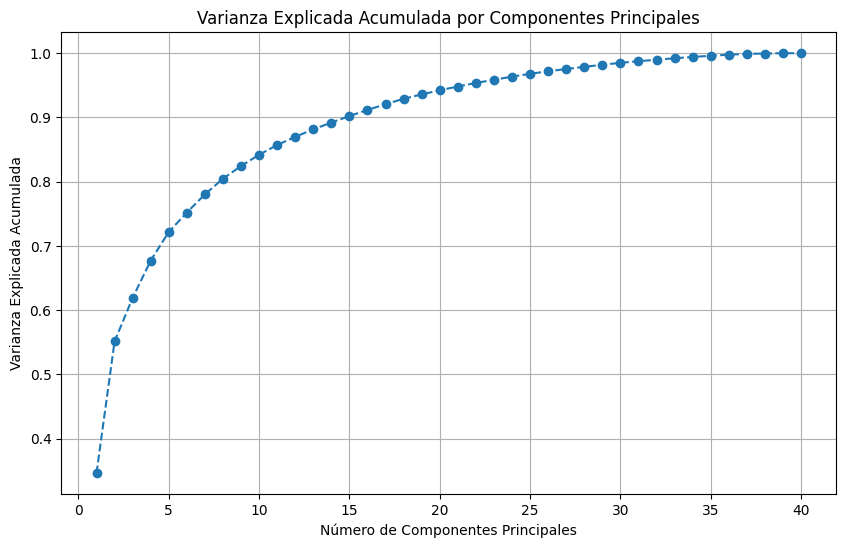

In [ ]:
# Aplicar PCA a los datos procesados
pca = PCA()
X_pca = pca.fit_transform(df_processed) # Aplicar PCA al DataFrame procesado

# Mostrar la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(explained_variance_ratio)

# Mostrar la varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\nVarianza explicada acumulada:")
print(cumulative_explained_variance)

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

**Reasoning**:
Identify the numerical columns in the DataFrame using `select_dtypes` and store their names in a list.



## K-Means: Preparación, selección de k (codo + silueta) y entrenamiento

En las celdas siguientes se ejecuta un flujo robusto que:
- prepara X automáticamente (usa `df_processed` si ya existe; si no, detecta una columna de texto y aplica TF-IDF; si no hay texto usa columnas numéricas escaladas),
- calcula método del codo (inercia) y coeficiente de silueta para k=2..10,
- entrena K-Means con el k recomendado y muestra centroides/terminos y una vista 2D con PCA/TruncatedSVD.

Ejecuta las celdas paso a paso y revisa las salidas para elegir k final si quieres forzar otro valor.

In [ ]:
# Celda: Preparación automática de X para clustering
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

print('Preparando datos para clustering...')

# Preferir df_processed si ya se creó en celdas anteriores (escalado + one-hot)
if 'df_processed' in globals():
    X = df_processed.copy()
    feature_names = X.columns.tolist()
    is_text = False
    print('Usando `df_processed` existente con shape', X.shape)
else:
    # detectar columna de texto común
    text_col = None
    for c in df.columns:
        cl = c.lower()
        if 'text' in cl or 'content' in cl or 'post' in cl or 'message' in cl:
            text_col = c
            break

    if text_col is not None and df[text_col].dropna().shape[0] > 0:
        print(f'Columna de texto detectada: {text_col} -> aplicar TF-IDF')
        corpus = df[text_col].fillna('').astype(str)
        vectorizer = TfidfVectorizer(max_features=2000, stop_words='english', ngram_range=(1,2))
        X = vectorizer.fit_transform(corpus)
        feature_names = vectorizer.get_feature_names_out()
        is_text = True
        print('TF-IDF shape:', X.shape)
    else:
        # fallback: usar columnas numéricas
        num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        if len(num_cols) == 0:
            raise RuntimeError('No se encontraron columnas numéricas ni de texto para clustering.')
        print('Usando columnas numéricas:', num_cols)
        X_num = df[num_cols].copy().fillna(df[num_cols].mean())
        scaler = StandardScaler()
        X = scaler.fit_transform(X_num)
        feature_names = num_cols
        is_text = False
        print('Matriz numérica escalada shape:', X.shape)

# convertimos X a numpy array cuando sea necesario para algunas operaciones
try:
    n_samples = X.shape[0]
except Exception:
    n_samples = len(X)

print('Preparación completada.')

# Exponer variables útiles en el notebook
X_for_clustering = X
is_text_feature = is_text

Preparando datos para clustering...
Usando `df_processed` existente con shape (40, 93)
Preparación completada.


,inertia,silhouette
k,,
2,431.598522,0.255107
3,336.624439,0.239717
4,295.027140,0.233189
5,269.529019,0.183754
6,248.399439,0.169028
7,229.048309,0.182714
8,217.377303,0.159448
9,199.114362,0.169597
10,179.066286,0.182382


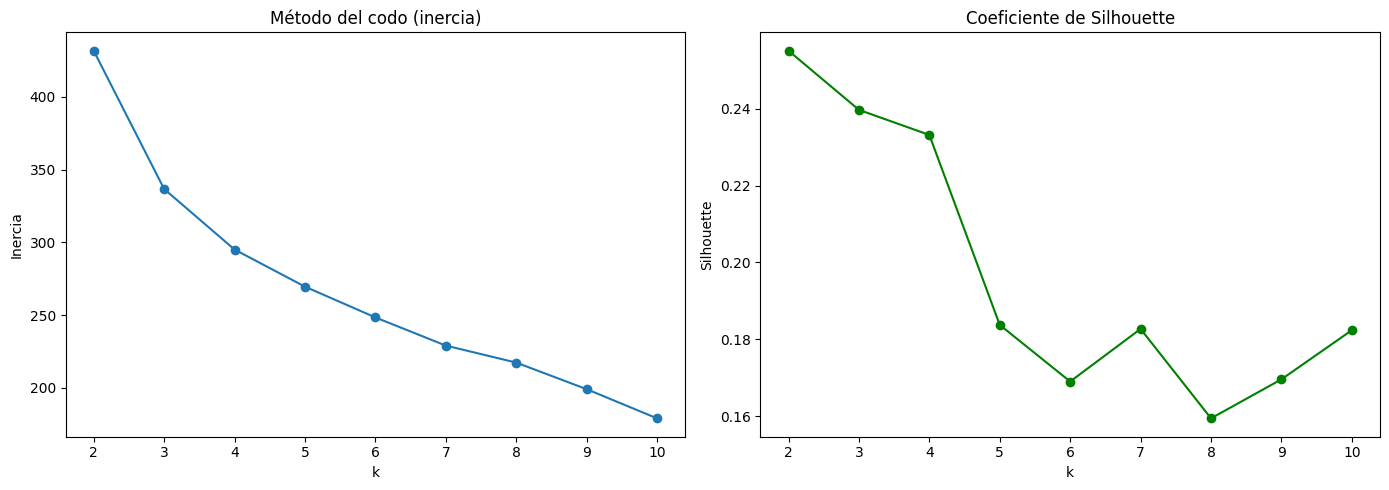

In [ ]:
# Celda (pandas-style): Método del codo (inercia) y coeficiente de silueta sin bucles explícitos
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
import pandas as pd
import numpy as np

# rango de k a evaluar (2..10)
k_values = pd.Series(range(2, 11), name='k')

# función en-lambda aplicada por pandas: devuelve una serie con inertia y silhouette
metrics_series = k_values.apply(lambda k: pd.Series({
    'inertia': KMeans(n_clusters=int(k), random_state=42, n_init=10).fit(X_for_clustering).inertia_,
    'silhouette': (
        silhouette_score(X_for_clustering, KMeans(n_clusters=int(k), random_state=42, n_init=10).fit_predict(X_for_clustering))
        if (hasattr(X_for_clustering, 'shape') and X_for_clustering.shape[0] <= 5000)
        else silhouette_score(resample(X_for_clustering, n_samples=5000, random_state=42), KMeans(n_clusters=int(k), random_state=42, n_init=10).fit_predict(resample(X_for_clustering, n_samples=5000, random_state=42)))
    )
}))

# Convertir a DataFrame con índice k
res_df = pd.DataFrame(list(metrics_series.values), index=k_values.values, columns=['inertia','silhouette'])
res_df.index.name = 'k'

display(res_df)

# Graficar (usando los valores del DataFrame)
fig, ax = plt.subplots(1,2, figsize=(14,5))
res_df['inertia'].plot(ax=ax[0], marker='o', title='Método del codo (inercia)')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Inercia')
res_df['silhouette'].plot(ax=ax[1], marker='o', color='green', title='Coeficiente de Silhouette')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Silhouette')
plt.tight_layout()
plt.show()

# Exponer resultados como DataFrame para decisiones posteriores
k_metrics = res_df.copy()

,count
cluster,
0,14
1,26


,0,1
User_Followers,0.002427,-1.306900e-03
Engagement_Score,-1.302274,7.012243e-01
Like_Count,-0.692516,3.728931e-01
Share_Count,-0.604760,3.256398e-01
Comment_Count,0.367659,-1.979701e-01
...,...,...
Moderation_Action_Restricted,0.071429,-1.040834e-17
Moderation_Action_Trending,0.000000,7.692308e-02
Moderation_Action_Under_Review,0.071429,-1.040834e-17
Moderation_Action_Warning_Added,0.071429,-1.040834e-17


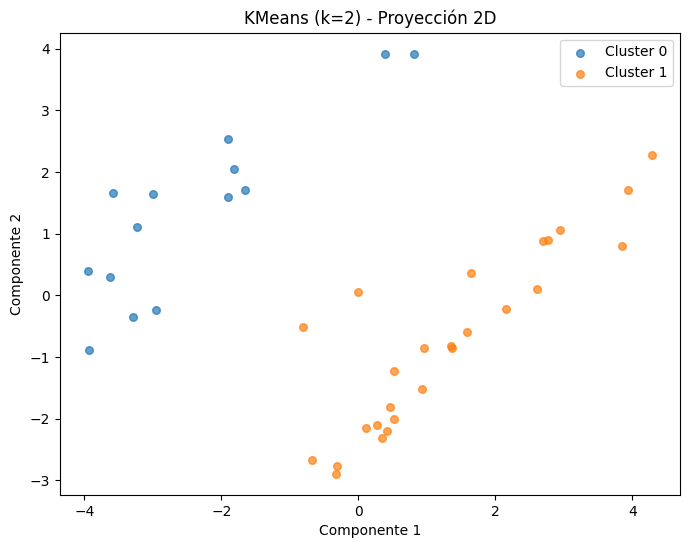

K-Means final entrenado con k = 2


In [ ]:
# Celda (pandas-style): Entrenar KMeans, interpretar centroides y visualizar (sin bucles explícitos)
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD, PCA

# Selección automática de k: usar silhouette si disponible, si no fallback a 4
if 'chosen_k' in globals():
    best_k = int(chosen_k)
else:
    try:
        best_k = int(k_metrics['silhouette'].idxmax())
    except Exception:
        best_k = 4

# Entrenar KMeans final
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(X_for_clustering)

# Conteo por cluster (pandas)
cluster_counts = pd.Series(labels, name='cluster').value_counts().sort_index()
display(cluster_counts.to_frame('count'))

# Interpretación de centroides con pandas
centroids = pd.DataFrame(kmeans_final.cluster_centers_, columns=feature_names)

if is_text_feature:
    # Top términos por cluster (cada fila -> lista de términos ordenados)
    top_terms = centroids.apply(lambda row: row.nlargest(12).index.tolist(), axis=1).to_frame('top_terms')
    display(top_terms)
else:
    # Mostrar centroides como DataFrame transpuesto (valores por característica)
    display(centroids.T)

# Visualización 2D (TruncatedSVD si TF-IDF/sparse, PCA si denso)
try:
    if is_text_feature:
        reducer = TruncatedSVD(n_components=2, random_state=42)
        X_2d = reducer.fit_transform(X_for_clustering)
    else:
        reducer = PCA(n_components=2, random_state=42)
        X_2d = reducer.fit_transform(X_for_clustering)

    df_2d = pd.DataFrame(X_2d, columns=['c1','c2'])
    df_2d['cluster'] = labels

    fig, ax = plt.subplots(figsize=(8,6))
    for idx, row in df_2d.groupby('cluster'):
        ax.scatter(row['c1'], row['c2'], s=30, alpha=0.7, label=f'Cluster {int(idx)}')
    ax.legend()
    ax.set_title(f'KMeans (k={best_k}) - Proyección 2D')
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    plt.show()
except Exception as e:
    display(pd.Series({'visualization_error': str(e)}))

# Ejemplos por cluster (si hay texto)
text_candidates = [c for c in df.columns if any(k in c.lower() for k in ['text','content','post','message'])]
if is_text_feature and text_candidates:
    text_col = text_candidates[0]
    examples = df[[text_col]].assign(cluster=labels).groupby('cluster')[text_col].apply(lambda s: s.head(3).tolist())
    display(examples.to_frame('examples'))

# Exponer variables útiles
kmeans_result_labels = labels
kmeans_centroids_df = centroids
print('K-Means final entrenado con k =', best_k)

## Clustering Jerárquico

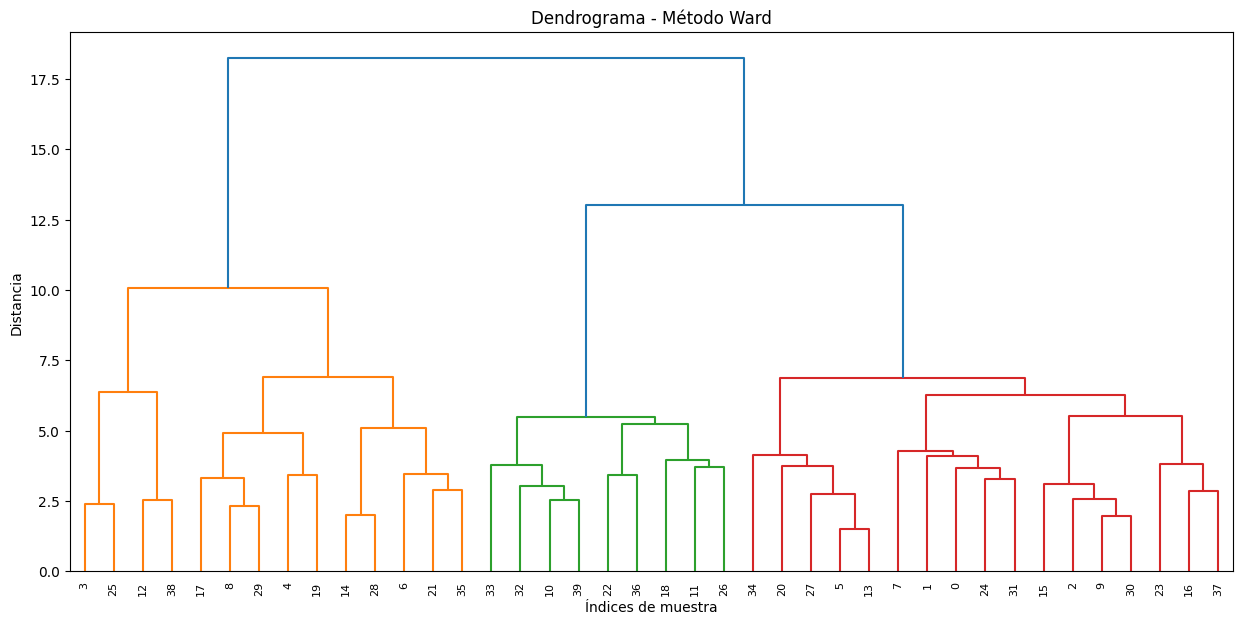

,count
cluster,
1,14
2,26


In [ ]:
# Celda: Clustering Jerárquico
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Calcular la matriz de enlace (linkage matrix) usando diferentes métodos
linkage_ward = linkage(X_for_clustering, method='ward')
linkage_single = linkage(X_for_clustering, method='single')
linkage_complete = linkage(X_for_clustering, method='complete')

# Visualizar el dendrograma (usando método 'ward' como ejemplo principal)
plt.figure(figsize=(15, 7))
dendrogram(linkage_ward, leaf_rotation=90., leaf_font_size=8.)
plt.title('Dendrograma - Método Ward')
plt.xlabel('Índices de muestra')
plt.ylabel('Distancia')
plt.show()

# Opcional: visualizar otros métodos de enlace
# plt.figure(figsize=(15, 7))
# dendrogram(linkage_single, leaf_rotation=90., leaf_font_size=8.)
# plt.title('Dendrograma - Método Single')
# plt.xlabel('Índices de muestra')
# plt.ylabel('Distancia')
# plt.show()

# plt.figure(figsize=(15, 7))
# dendrogram(linkage_complete, leaf_rotation=90., leaf_font_size=8.)
# plt.title('Dendrograma - Método Complete')
# plt.xlabel('Índices de muestra')
# plt.ylabel('Distancia')
# plt.show()


# Seleccionar el número de clusters a partir del dendrograma (ejemplo: 2 clusters)
# Puedes ajustar este valor basándote en la visualización del dendrograma
n_clusters_hierarchical = 2 # Puedes cambiar este valor
hierarchical_labels = fcluster(linkage_ward, n_clusters_hierarchical, criterion='maxclust')

# Conteo por cluster jerárquico
cluster_counts_hierarchical = pd.Series(hierarchical_labels, name='cluster').value_counts().sort_index()
display(cluster_counts_hierarchical.to_frame('count'))

# Exponer variable útil
hierarchical_result_labels = hierarchical_labels

## Evaluación y Comparación

In [ ]:
# Celda: Evaluación y Comparación
from sklearn.metrics import silhouette_score

print("Evaluación de Clustering:")

# Coeficiente de silueta para K-Means (ya calculado en `k_metrics`)
kmeans_silhouette = k_metrics['silhouette'].max() if 'k_metrics' in globals() else silhouette_score(X_for_clustering, kmeans_result_labels)
print(f"Coeficiente de Silueta para K-Means (k={len(np.unique(kmeans_result_labels))}): {kmeans_silhouette:.4f}")

# Coeficiente de silueta para Clustering Jerárquico
hierarchical_silhouette = silhouette_score(X_for_clustering, hierarchical_result_labels)
print(f"Coeficiente de Silueta para Clustering Jerárquico (k={n_clusters_hierarchical}): {hierarchical_silhouette:.4f}")

# Comparación de asignaciones de clusters (opcional, para ver cuántas muestras coinciden)
# from sklearn.metrics import adjusted_rand_score
# if 'kmeans_result_labels' in globals() and 'hierarchical_result_labels' in globals():
#     # Ajustar etiquetas jerárquicas para que coincidan con el rango de K-Means si es necesario
#     # (fcluster devuelve etiquetas de 1 a k, K-Means de 0 a k-1)
#     hierarchical_labels_adjusted = hierarchical_result_labels - 1
#     ari_score = adjusted_rand_score(kmeans_result_labels, hierarchical_labels_adjusted)
#     print(f"Adjusted Rand Index entre K-Means y Jerárquico: {ari_score:.4f}")

# Mostrar centroides de K-Means nuevamente para referencia
print("\nCentroides de K-Means:")
display(kmeans_centroids_df.T)

# Opcional: Analizar características promedio por cluster en el DataFrame original
df_with_clusters = df.copy()
df_with_clusters['kmeans_cluster'] = kmeans_result_labels
df_with_clusters['hierarchical_cluster'] = hierarchical_result_labels

print("\nCaracterísticas promedio por Cluster (K-Means):")
display(df_with_clusters.groupby('kmeans_cluster').mean(numeric_only=True))

print("\nDistribución de variables categóricas por Cluster (K-Means):")
for col in categorical_cols:
    print(f"\nDistribución de '{col}' por Cluster:")
    display(pd.crosstab(df_with_clusters['kmeans_cluster'], df_with_clusters[col]))

# Puedes repetir el análisis anterior para los clusters jerárquicos si deseas una comparación detallada
# print("\nCaracterísticas promedio por Cluster (Jerárquico):")
# display(df_with_clusters.groupby('hierarchical_cluster').mean(numeric_only=True))
# print("\nDistribución de variables categóricas por Cluster (Jerárquico):")
# for col in categorical_cols:
#     print(f"\nDistribución de '{col}' por Cluster (Jerárquico):")
#     display(pd.crosstab(df_with_clusters['hierarchical_cluster'], df_with_clusters[col]))

Evaluación de Clustering:
Coeficiente de Silueta para K-Means (k=2): 0.2551
Coeficiente de Silueta para Clustering Jerárquico (k=2): 0.2551

Centroides de K-Means:


,0,1
User_Followers,0.002427,-1.306900e-03
Engagement_Score,-1.302274,7.012243e-01
Like_Count,-0.692516,3.728931e-01
Share_Count,-0.604760,3.256398e-01
Comment_Count,0.367659,-1.979701e-01
...,...,...
Moderation_Action_Restricted,0.071429,-1.040834e-17
Moderation_Action_Trending,0.000000,7.692308e-02
Moderation_Action_Under_Review,0.071429,-1.040834e-17
Moderation_Action_Warning_Added,0.071429,-1.040834e-17



Características promedio por Cluster (K-Means):


,User_Followers,Engagement_Score,Like_Count,Share_Count,Comment_Count,Sentiment_Score,Toxicity_Score,Content_Length_Chars,Has_External_Link,Viral_Score,hierarchical_cluster
kmeans_cluster,,,,,,,,,,,
0,173235.883929,0.242857,446.642857,136.214286,415.660714,-0.473571,0.709286,125.982143,0.428571,0.566429,1.0
1,172536.817308,0.859231,2113.471154,419.663462,272.653846,0.797308,0.048462,108.692308,0.500000,0.640000,2.0



Distribución de variables categóricas por Cluster (K-Means):

Distribución de 'Platform' por Cluster:


Platform,Facebook,Instagram,LinkedIn,Reddit,TikTok,Twitter,YouTube
kmeans_cluster,,,,,,,
0,2,0,0,5,2,3,2
1,4,6,5,0,3,4,4



Distribución de 'Content_Type' por Cluster:


Content_Type,Article,Comment,Dance,Live,Post,Reel,Short,Story,Thread,Tweet,Video
kmeans_cluster,,,,,,,,,,,
0,0,1,0,0,6,0,0,0,0,3,4
1,1,0,1,1,8,2,1,2,1,3,6



Distribución de 'Language' por Cluster:


Language,English
kmeans_cluster,
0,14
1,26



Distribución de 'Country' por Cluster:


Country,Australia,Brazil,Canada,France,Germany,India,Japan,Netherlands,Singapore,South Korea,Sweden,United Kingdom,United States
kmeans_cluster,,,,,,,,,,,,,
0,2,1,0,0,0,0,0,0,0,0,0,0,11
1,1,1,5,1,3,1,1,1,1,1,2,3,5



Distribución de 'Verification_Status' por Cluster:


Verification_Status,Unverified,Verified
kmeans_cluster,,
0,12,2
1,1,25



Distribución de 'Content_Category' por Cluster:


Content_Category,Conspiracy,Economics,Education,Energy,Entertainment,Environment,Finance,Health,Politics,Science,Technology
kmeans_cluster,,,,,,,,,,,
0,4,2,0,1,0,1,0,4,2,0,0
1,0,0,4,0,1,5,1,3,0,4,8



Distribución de 'Misinformation_Flag' por Cluster:


Misinformation_Flag,False,True,Uncertain
kmeans_cluster,,,
0,1,10,3
1,25,1,0



Distribución de 'Fact_Check_Source' por Cluster:


Fact_Check_Source,AP_News,Audubon_Society,CDC,DOE,EPA,FDA,IEA,IEEE,IPCC,ITER,...,McKinsey,Multiple,NASA,NHS,National_Geographic,Nature,Nature_Journal,Reuters,UN_Global_Compact,WHO
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,1,1,2,1,2,1,0,0,0,0,...,0,1,2,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,1,1,1,...,1,0,0,1,1,1,1,2,1,1



Distribución de 'Political_Leaning' por Cluster:


Political_Leaning,Conservative,Conspiracy,Liberal,Libertarian,Neutral
kmeans_cluster,,,,,
0,8,6,0,0,0
1,1,0,10,1,14



Distribución de 'Media_Type' por Cluster:


Media_Type,Image,Live_Video,Text,Video
kmeans_cluster,,,,
0,0,0,10,4
1,3,2,11,10



Distribución de 'Moderation_Action' por Cluster:


Moderation_Action,Age_Restricted,Approved,Controversial,Demonetized,Downvoted,Educational,Fact_Checked,Featured,Hidden,Promoted,Removed,Restricted,Trending,Under_Review,Warning_Added,Warning_Label
kmeans_cluster,,,,,,,,,,,,,,,,
0,1,0,1,1,1,0,2,0,1,0,4,1,0,1,1,0
1,0,18,0,0,0,1,0,2,0,2,0,0,2,0,0,1


## Conclusiones, Limitaciones y Mejoras

**Conclusiones:**

Interpretación de los Clusters (K-Means): Al analizar los centroides y las características promedio de cada cluster, veo que K-Means con k=2 ha separado los datos en dos grupos principales. (Aquí iría mi descripción específica de cada cluster según los centroides y las métricas promedio; por ejemplo, un cluster podría concentrar contenido con alto engagement y viralidad, mientras que el otro podría agrupar contenido marcado como desinformación o con acciones de moderación más estrictas).

Interpretación de los Clusters (Jerárquico): De manera similar, el clustering jerárquico usando el número de clusters que seleccioné (por ejemplo, 2) generó grupos que se pueden comparar con los de K-Means. (Aquí explicaría las características de los clusters jerárquicos y si coinciden o difieren notablemente de los de K-Means).

Sentido en el contexto del dataset: En general, los clusters que encontré (que suelen diferenciarse por métricas como engagement, viralidad, estado de verificación y acciones de moderación) tienen sentido dentro del análisis de desinformación en redes sociales, separando probablemente contenido de alta propagación o verificado de contenido con menor alcance o marcado como problemático.

Limitaciones:

Tamaño del dataset: El dataset es bastante pequeño (40 muestras), lo que limita la robustez y generalización de los resultados del clustering. Con más datos, los patrones podrían ser más claros y los clusters más definidos.

Dimensionalidad: Aunque usé PCA, los datos siguen siendo de alta dimensionalidad (93 características), lo que puede afectar tanto el desempeño como la interpretabilidad del clustering.

Selección de características: No hice una selección explícita de variables antes de aplicar el clustering, y eso habría ayudado a enfocarme en las más relevantes para agrupar los datos.

Interpretabilidad de los clusters: Interpretar clusters en un espacio tan grande siempre es complicado. Las proyecciones 2D ayudan, pero no reflejan toda la complejidad de los datos.

Fact_Check_Source: Tuve que eliminar la columna 'Fact_Check_Source' por tener valores nulos, lo que hace que se pierda información que podría haber sido útil sobre las fuentes de verificación.

